<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    <b>کلاس Tensor: </b><br>
     Tensor
     کلاسی است که اشیایی که از این کلاس ساخته می شوند دارای مقدار عددی و لیستی از فرزندان که از جنس
     Tensor
     هستند می‌باشند. همچنین این کلاس دارای متدهایی برای انجام عملیات مختلف ریاضی روی تنسور و محاسبه گرادیان نسبت به فرزندان است.
     وتابع
     backward
     گرادیان فرزندان را نسبت به تنسور مورد نظر حساب می کند.
     در هر متد عمیلات مختلف مثل ضرب و جمع و تفریق پیاده سازی شده که گرادیان فرزندان را محاسبه می کند.
     هرکدام از متد های عملیات ریاضی عملیات مورد نظر را روی تنسور ها انجام می دهد و خروجی را در تنسور جدیدی قرار می دهد.
        
</font>    
</p>

In [ ]:
class Tensor:

  def __init__(self, value, label='', children=(), operator=None):
    self.value = value
    self.children = set(children)
    self.operator = operator
    self.grad = 0
    self._backward = lambda  : None
    self.label = label

  def __repr__(self) -> str:
    return f"Tensor(value={self.value})"

  def __mul__(self, other):
    other = other if isinstance(other, Tensor) else Tensor(other)

    out = Tensor(self.value*other.value, children= (self, other), operator='*')

    def backward():
      self.grad += other.value * out.grad
      other.grad += self.value * out.grad

    out._backward = backward

    return out

  def __sub__(self, other):
    other = other if isinstance(other, Tensor) else Tensor(other)

    out = Tensor(self.value-other.value, children= (self, other), operator='-')

    def backward():
      self.grad += 1 * out.grad
      other.grad += -1 * out.grad

    out._backward = backward

    return out

  def __add__(self, other):

    other = other if isinstance(other, Tensor) else Tensor(other)

    out = Tensor(self.value+other.value, children= (self, other), operator='+')

    def backward():
      self.grad += 1 * out.grad
      other.grad += 1 * out.grad

    out._backward = backward

    return out


  def __radd__(self, other):
    return self + other

  def __rsub__(self, other):
    return -1 * self + other

  def __rmul__(self, other):
    return self * other

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
   کلاس
   Activation:
   <br>
   در این کلاس توابع فعال سازی مختلفی به صورت استاتیک مثل سیگموید و تانژانت هایپربولیک پیاده سازی شده اند.
   که در ابتدا ورودی تنسور را گرفته و مقدار خروجی از این تابع را در تنسور جدیدی قرار می دهد که پدر تنسور قبلی است و
   backward
    این تابع گرادیان خروجی نسبت به ورودی را حساب می کند.
    <br>
    <br>
    کلاس
    Loss:
    <br>
    در این کلاس توابع هزینه مختلفی مثل میانگین مربعات و تابع خطاهای مختلف پیاده سازی شده اند.
    که در اصل مقدار خروجی شبکه را می گیرد و آن را به تنسور تبدیل کرده و تابع
    هزینه مورد نظر را برای آن محاسبه می کند.
    و در تنسور جدیدی که ایجاد میکند قرار می دهد که پدر تنسور ورودی است و
    backward
    out.grad=1
    زیرا انگار گرادیان خود
    loss
    نسبت به خودش است.
    و گرادیان خروجی را محاسبه می کند.
    <br>
    <br>
    کلاس
    Manager:
    <br>
    یک متد
    topological_sort
    که در اصل تسور اخر شبکه عصبی را می گیرد و یک لیست از تنسور های مرتب شده بر اساس ترتیب محاسبات را بر می گرداند.
    که هیچ تنسوری نباشد که وقتی آن را محاسبه می کنیم گرادیان پدرش محاسبه نشده باشد.
    و یک متد
    backward_button
    هسست که  تنسور
    loss
    را می گیرد و ابتدا
    topological_sort
    را اجرا می کند و سپس برای هر تنسوری که در لیست مرتب شده است
    backward
    آن را اجرا می کند.
</font>    
</p>

In [ ]:
import math
class Activation:

    @staticmethod
    def relu(x:Tensor):
        value = x.value
        output = Tensor(max(0, value), children=(x,), operator='ReLU')

        def backward():
            x.grad = (value > 0) * output.grad

        output._backward = backward

        return output

    @staticmethod
    def tanh(x:Tensor):
        val = x.value
        out = Tensor(value=(math.exp(val)-math.exp(-1*val))/(math.exp(val)+math.exp(-1*val)), children=(x,), operator='tanh')

        def backward():
            x.grad = (1 - out.value**2) * out.grad

        out._backward = backward

        return out

    @staticmethod
    def sigmoid(x:Tensor):
        value = x.value
        output = Tensor(value=1/(1+math.exp(-1*value)), children=(x,), operator='sigmoid')

        def backward():
            x.grad = output.value * (1 - output.value) * output.grad

        output._backward = backward

        return output
class Loss:

        @staticmethod
        def mse(y_hat:Tensor, y):
            output = Tensor(value=(y_hat.value - y)*(y_hat.value - y), label='loss', children=(y_hat,), operator='loss')
            output.grad = 1
            def backward():
                y_hat.grad = 2 * (y_hat.value - y) * output.grad

            output._backward = backward
            return output

        @staticmethod
        def cross_entropy(y_hat:Tensor, y):
            output = Tensor(value=-1*(y*math.log(y_hat.value) + (1-y)*math.log(1-y_hat.value)), label='loss', children=(y_hat,), operator='loss')
            output.grad = 1
            def backward():
                y_hat.grad = -1 * (y/y_hat.value - (1-y)/(1-y_hat.value))
            output._backward = backward
            return output

class Manager:
    @staticmethod
    def toplogicalSort(node,visited,list):
        visited.append(node)
        for child in node.children:
            if child not in visited:
                Manager.toplogicalSort(child,visited,list)
        list.append(node)
        return list[::-1]

    @staticmethod
    def backWardButton(loss:Tensor):
        list = Manager.toplogicalSort(loss, [], [])
        for tensor in list:
            tensor._backward()



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    <b>کلاس Neuron: </b><br>
    این کلاس هر نورون را پیاده سازی می کند که دارای وزن و بایاس و تابع فعال سازی است. که به صورت لیتی از تنسور ها و یا تنسور اند.
    و وزن ها و بایاس ها را به صورت تصادفی در اندازه ورودی  مقدار دهی می کند.
    و یک متد
    forward
    که ورودی را گرفته
    وابتدا با ضرب داخلی در وزن و جمع کردن با بایاس مقدار خروجی را محاسبه می کند و سپس این مقدار را به تابع فعال سازی می دهد..
    چون همه مقدار ها تنسور هستند در گراف محاسباتی این بخش ها قرار داده می شوند.
    <br>
    و یک متد
    parameters
    که وزن ها و بایاس ها را در یک لیست بر می گرداند.
    <br>
    و یک متد
    call
    که همان
    forward
    را اجرا می کند.
</font>    
</p>


In [ ]:
import random
import numpy as np
class Neuron:
    def __init__(self,inputsize,activation_function = Activation.tanh):
        self.activation_function = activation_function
        weights = np.random.randn(inputsize)
        self.weight = [Tensor(w) for w in weights]
        self.bias = Tensor(random.random())

    def forward(self,x):
        out = self.bias
        for i in range(len(self.weight)):
            out = out + x[i]*self.weight[i]
        return self.activation_function(out)

    def __call__(self,x):
        return self.forward(x)

    def parameters(self):
        return self.weight + [self.bias]

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    <b>کلاس Layer: </b><br>
  در این کلاس یک لایه را پیاده سازی می کند که در ابتدا به اندازه سازی که دریافت میکند لیستی با همان اندازه از نورون ها ایجاد میکند و تابع فعالساز این لایه را به نورون ها نیز منتقل می کند.
  <br>
    forward
    همین متد را در نورون هایش صدا می زند و خروجی ها در یک لیست قرار می دهد
    واین لیست را بر می گرداند.
    اگر خروجی یکی باشد به صورت عدد بر می گرداند. که برای لایه های آخر شبکه عصبی استفاده می شود.
    <br>
    parameters
    همین متد را در نورون هایش صدا می زند و وزن ها و بایاس ها را در یک لیست بر می گرداند.

</font>    
</p>


In [ ]:
class Layer:
    def __init__(self,inputsize,outputsize,activation_function = Activation.tanh):
        self.nodes = [Neuron(inputsize,activation_function) for i in range(outputsize)]
    def forward(self,x):
        out = []
        for n in self.nodes:
            out.append(n(x))
        if len(out) == 1:
            return out[0]
        return out
    def __call__(self,x):
        return self.forward(x)
    def parameters(self):
        return [parameter for node in self.nodes for parameter in node.parameters()]


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    <b>کلاس Mlp: </b><br>
    این کلاس یک شبکه عصبی چند لایه ای را پیاده سازی می کند که در ابتدا به اندازه سازی ورودی و تعداد لایه ها و تعداد نورون های هر لایه لیستی از لایه ها ایجاد می کند.
    و لیستی از توابع فعال سازی هر لایه را دریافت می کند
    و خود متد را به لایه هایی که میسازد منتقل می کند.
    <br>
    forward
    این متد ابتدا ورودی را به لایه اول می دهد و خروجی را به لایه بعدی و به همین ترتیب می دهد و در نهایت خروجی لایه آخر را بر می گرداند.
    <br>
    parameters
    این متد وزن ها و بایاس ها هر لایه را در لیست بر می گرداند.

</font>    
</p>


In [ ]:
class MLP:
    def __init__(self,sizes,inputsize,activations):

        self.activation_functions = []
        for a in activations:
            if a == 'relu':
                self.activation_functions.append(Activation.relu)
            elif a == 'tanh':
                self.activation_functions.append(Activation.tanh)
            elif a == 'sigmoid':
                self.activation_functions.append(Activation.sigmoid)

        sizes = [inputsize] + sizes
        self.layers = []
        for i in range(1,len(sizes)):
            self.layers.append(Layer(sizes[i-1],sizes[i],self.activation_functions[i-1]))

    def forward(self,x):
        out = x
        for l in self.layers:
            out = l(out)
        return out

    def __call__(self,x):
        return self.forward(x)

    def parameters(self):
        return [parameter for layer in self.layers for parameter in layer.parameters()]

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    <b>کلاس Optimizer: </b><br>
    این کلاس همه پارامتر ها که لیستی وزن ها و بایاس ها است را دریافت می کند و همچنین
    لرنینگ ریت را نیز دریافت می کند.
    <br>
    zero_grad:
    <br>
    این متد گرادیان های همه پارامتر ها را صفر می کند.
    <br>
    step:
    <br>
    این متد گرادیان های همه پارامتر ها را بر اساس لرنینگ ریت به روز رسانی می کند.


</font>    
</p>


In [ ]:
class Optimizer:
    def __init__(self,parameters,lr=0.1):
        self.parameters = parameters
        self.lr = lr
    def zeroGrad(self):
        for p in self.parameters:
            p.grad = 0

    def step(self,grads):
        i = 0
        for p in self.parameters:
            p.value = p.value - self.lr * grads[i]
            i+=1

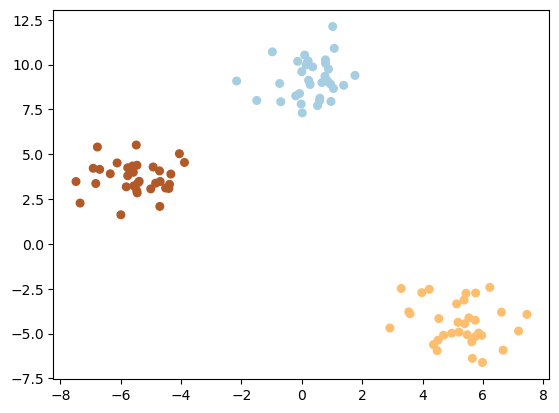

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

X, Y = make_blobs(n_samples=100, n_features=2, centers=3, random_state=23)
Y = Y - 1
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ما داده های مورد نظر را که
Y
آن ها بین منفی یک تا یک است
را ساخته ایم .
ابتدا مدل را با استفاده از
Mlp
می سازیم.
و همچنین
optimizer
را نیز می سازیم و پارامتر های مدل را به آن می دهیم
و همچنین لرنینگ ریت را نیز به آن می دهیم.
تعداد ایپاک را مشخص کرده و وبه ازای هرایپاک ابتدا به ازای همه داده خروجی ها را محاسبه کرده و دلیست قرار می دهیم
و سپس
Loss
هارا نیز به ازای همه داده ها محاسبه می کنیم و در لیست قرار می دهیم
.
قرار است مجموع گرادیان های این ایپاک را در
sum_grad
قرار دهیم.
و سپس گرادیان های همه پارامتر ها را بر اساس امیانگین گرادیان ها به روز رسانی می کنیم.
سپس به ازای
loss
هر ایپاک
لاس هر داده را با
cost
جمع می کنیم.
گرادیان های پارامتر ها صفر می کنیم و
backward_button
را اجرا می کنیم
که همه گرادیان هارا محاسبه می کند.
و هر گرادیان پارامتر هارا که محاسبه کردیم با متناظر آن در
sum_grad
جمع می کنیم.
بعد ازن با تقسیم بر ظول میانیگن گرادیان های این ایپاک را محاسبه و در پایان این ایپاک پارامتر هارا به روز رسانی می کنیم.
و
cost
هر ایپاک را چاپ می کنیم.
   

</font>    
</p>


In [ ]:
model = MLP([2, 1],2, ['tanh','tanh'])
optim = Optimizer(model.parameters(), 0.01)
n_epochs = 200
for epoch in range(n_epochs):
    y_hats = [model(x) for x in X]
    losses = [Loss.mse(y_hat, y) for y_hat, y in zip(y_hats, Y)]
    cost = 0
    sum_grads = []
    for param in model.parameters():
        sum_grads.append(0)

    for loss in losses:
        cost += loss.value
        optim.zeroGrad()
        Manager.backWardButton(loss)

        i = 0
        for param in model.parameters():
            sum_grads[i] += param.grad
            i += 1

    for grad in sum_grads:
        grad /= len(Y)

    optim.step(sum_grads)

    print(f'epoch{epoch+1} : cost:', cost/len(Y))


epoch1 : cost: 0.7114921256413586
epoch2 : cost: 0.2239067428865587
epoch3 : cost: 0.03724742247358074
epoch4 : cost: 0.026251090860583616
epoch5 : cost: 0.022444203754657513
epoch6 : cost: 0.01889717888797501
epoch7 : cost: 0.017160339513448194
epoch8 : cost: 0.015295021366249481
epoch9 : cost: 0.014227671235269421
epoch10 : cost: 0.01302172546196203
epoch11 : cost: 0.01226317637026797
epoch12 : cost: 0.011392358860433202
epoch13 : cost: 0.010807867063981503
epoch14 : cost: 0.010136278552576589
epoch15 : cost: 0.009663551857504163
epoch16 : cost: 0.009123527768858268
epoch17 : cost: 0.008729158631004198
epoch18 : cost: 0.008282507724328174
epoch19 : cost: 0.007946484694875841
epoch20 : cost: 0.007569534501814191
epoch21 : cost: 0.007278828535357059
epoch22 : cost: 0.0069558380628289805
epoch23 : cost: 0.00670141523688155
epoch24 : cost: 0.006421347190692223
epoch25 : cost: 0.006196637900893758
epoch26 : cost: 0.00595143283107846
epoch27 : cost: 0.005751482489610961
epoch28 : cost: 0.0

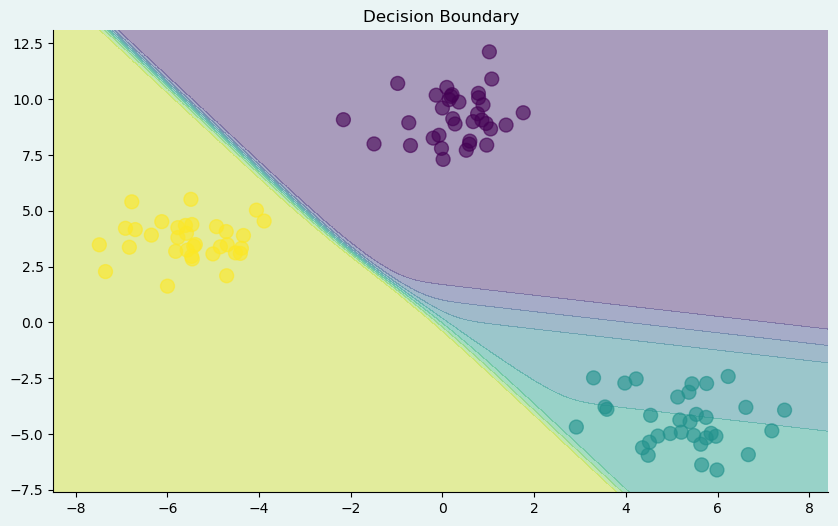

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = np.array([model([x, y]).value for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")

ax.scatter(X[:,0], X[:,1], c=Y, cmap="viridis", alpha=0.6, s=100)

ax.set_title("Decision Boundary")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines[["top", "right"]].set_visible(False)
plt.show()

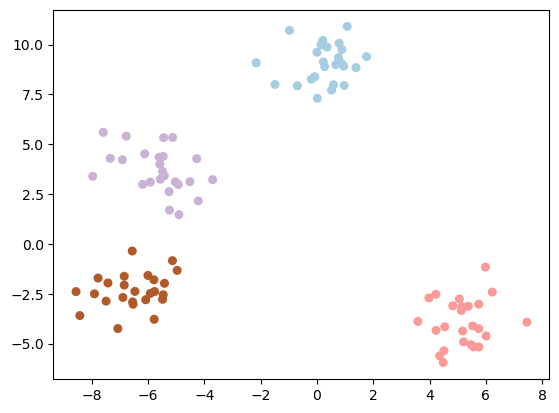

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

X, Y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=23)
Y = (Y/3)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
plt.show()

In [ ]:
model = MLP([6,4, 1],2, ['relu', 'tanh','sigmoid'])
optim = Optimizer(model.parameters(), 0.01)
n_epochs = 200
costs = []
for epoch in range(n_epochs):
    y_hats = [model(x) for x in X]

    losses = [Loss.mse(y_hat, y) for y_hat, y in zip(y_hats, Y)]
    cost = 0

    grads = []
    for param in model.parameters():
        grads.append(0)

    for loss in losses:
        cost += loss.value
        optim.zeroGrad()
        Manager.backWardButton(loss)

        i = 0
        for param in model.parameters():
            grads[i] += param.grad
            i += 1

    for grad in grads:
        grad /= len(Y)

    optim.step(grads)

    print(f'epoch{epoch+1} : cost:', cost/len(Y))
    costs.append(math.log10(cost))

epoch1 : cost: 0.22865916940591202
epoch2 : cost: 0.19550810507533975
epoch3 : cost: 0.18249255159851357
epoch4 : cost: 0.17078759954550582
epoch5 : cost: 0.1603795534492859
epoch6 : cost: 0.15114960301355843
epoch7 : cost: 0.1429265497087447
epoch8 : cost: 0.13555023803524932
epoch9 : cost: 0.128896536608731
epoch10 : cost: 0.12286661536306331
epoch11 : cost: 0.11733581935497668
epoch12 : cost: 0.11204260593126433
epoch13 : cost: 0.10644470705582464
epoch14 : cost: 0.09965260175791599
epoch15 : cost: 0.09012133594345409
epoch16 : cost: 0.08053315016229023
epoch17 : cost: 0.07359768266495666
epoch18 : cost: 0.06707941642842785
epoch19 : cost: 0.062148830273822675
epoch20 : cost: 0.05796800534627842
epoch21 : cost: 0.05429803162655897
epoch22 : cost: 0.051040046827730993
epoch23 : cost: 0.048126523146871644
epoch24 : cost: 0.045505239239054945
epoch25 : cost: 0.043132785942309286
epoch26 : cost: 0.040970707137146685
epoch27 : cost: 0.038981795627189834
epoch28 : cost: 0.0371221620966723

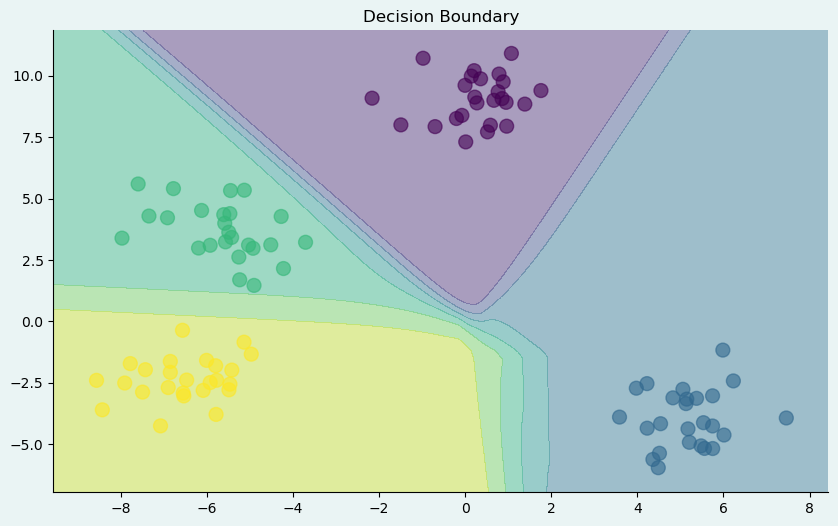

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = np.array([model([x, y]).value for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")

ax.scatter(X[:,0], X[:,1], c=Y, cmap="viridis", alpha=0.6, s=100)

ax.set_title("Decision Boundary")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines[["top", "right"]].set_visible(False)
plt.show()

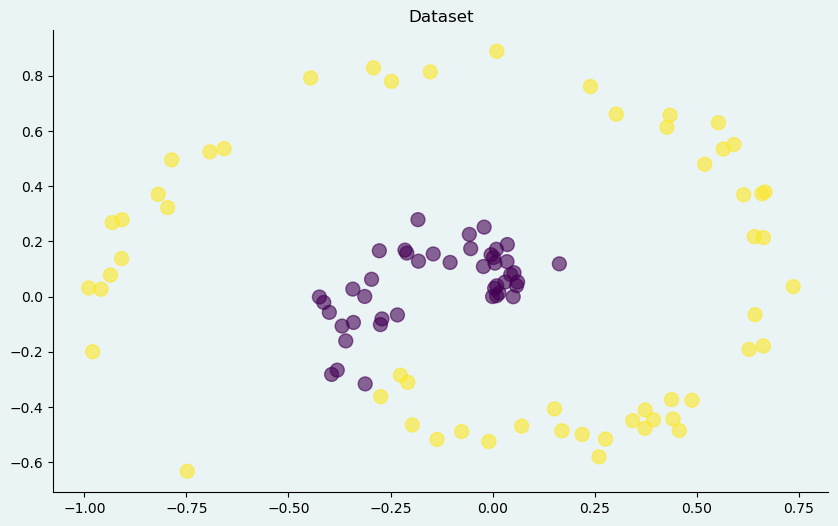

In [ ]:
np.random.seed(0)
n = 100
r = np.linspace(0, 1, n)
t = 3 * np.pi * r + np.random.normal(0, 0.5, n)
X = np.c_[r * np.cos(t), r * np.sin(t)]
Y = np.zeros(n)
Y[t > 4] = 1
Y[Y == 0] = 0

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X[:,0], X[:,1], c=Y, cmap="viridis", alpha=0.6, s=100)

ax.set_title("Dataset")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines[["top", "right"]].set_visible(False)

plt.show()

In [ ]:
model = MLP([8,4, 1],2, ['relu','relu', 'sigmoid'])
optim = Optimizer(model.parameters(), 0.008)
n_epochs = 200
costs = []
for epoch in range(n_epochs):
    y_hats = [model(x) for x in X]

    losses = [Loss.mse(y_hat, y) for y_hat, y in zip(y_hats, Y)]
    cost = 0

    grads = []
    for param in model.parameters():
        grads.append(0)

    for loss in losses:
        cost += loss.value
        optim.zeroGrad()
        Manager.backWardButton(loss)

        i = 0
        for param in model.parameters():
            grads[i] += param.grad
            i += 1

    for grad in grads:
        grad /= len(Y)

    optim.step(grads)

    print(f'epoch{epoch+1} : cost:', cost/len(Y))
    costs.append(math.log10(cost))

epoch1 : cost: 0.30671566862547917
epoch2 : cost: 0.2798591217784348
epoch3 : cost: 0.2567763223907632
epoch4 : cost: 0.2368220278282295
epoch5 : cost: 0.21953837594498796
epoch6 : cost: 0.20424425541184765
epoch7 : cost: 0.19086666422347637
epoch8 : cost: 0.1788050545086807
epoch9 : cost: 0.16821370890209258
epoch10 : cost: 0.15871158425060247
epoch11 : cost: 0.150003675731178
epoch12 : cost: 0.14211700216235307
epoch13 : cost: 0.13471539444035352
epoch14 : cost: 0.12766434462938078
epoch15 : cost: 0.12102581252775917
epoch16 : cost: 0.11467812660588668
epoch17 : cost: 0.10862878698555811
epoch18 : cost: 0.10289396057054807
epoch19 : cost: 0.09744265527038137
epoch20 : cost: 0.09222194241990345
epoch21 : cost: 0.08724997522643672
epoch22 : cost: 0.08254981316489499
epoch23 : cost: 0.07817803706051354
epoch24 : cost: 0.07410384334881112
epoch25 : cost: 0.07028440827145088
epoch26 : cost: 0.06669743576912307
epoch27 : cost: 0.0633418850346163
epoch28 : cost: 0.06019939140117721
epoch29 

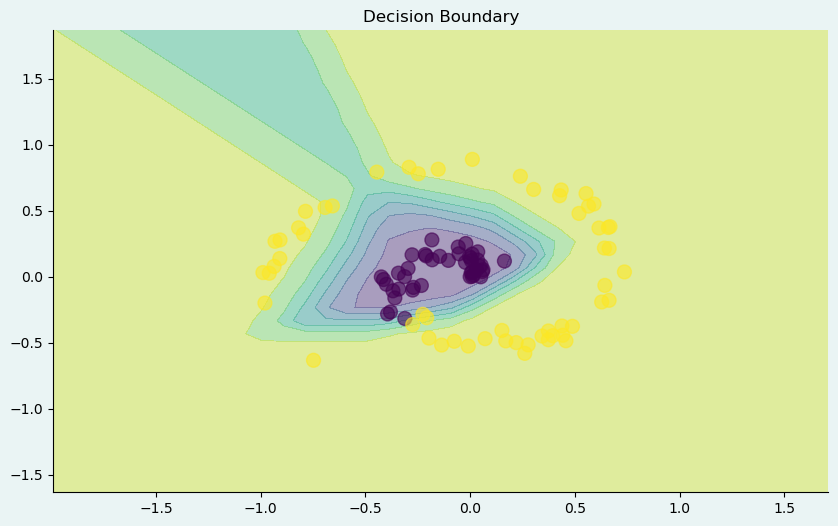

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = np.array([model([x, y]).value for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")

ax.scatter(X[:,0], X[:,1], c=Y, cmap="viridis", alpha=0.6, s=100)

ax.set_title("Decision Boundary")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines[["top", "right"]].set_visible(False)
plt.show()